    For the Boston Housing dataset, we observe that
    the median value of the home (medv) is:
        directly proportional to the number of rooms (rm)
        inversely proportional to the percentage of lower status population (lstat)

    We will do the following to predict 'medv':
        simple linear regression of 'rm'
        multiple linear regression of 'rm', and 'lstat'
        polynomial linear regression

### Imports

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [2]:
#read data
df_data = pd.read_csv ('./datasets/boston-housing.csv')
#train and test data separation
msk = np.random.rand(len(df_data)) < 0.9
df = df_data[msk]
df_test = df_data[~msk]
df.head (2)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


### Exploratory data analysis

In [ ]:
#exploratory data analysis
sns.set (rc = {'figure.figsize': (12,9)}) #rc = run command
corr_matrix = df.corr().round (2)
sns.heatmap (data = corr_matrix, annot = True)
plt.show ()

    'medv' is positively correlated with 'rm'
    'medv' is negatively correlated with 'lstat'

#### 'medv' is positively correlated with 'rm'

In [ ]:
sns.regplot (x = 'rm', y = 'medv', data = df)
plt.show ()

#### 'medv' is negatively correlated with 'lstat'

In [ ]:
sns.regplot (x = 'lstat', y = 'medv', data = df)
plt.show ()

### Simple Linear Regression - Analytical Solution

<img src="LR_analyticalSol.png">

#### prepare X and y

In [48]:
X = np.ones ((df.shape[0], 2))
X [:, 1] = df ['rm']
#X.shape #(333, 2)
y = df ['medv'].to_numpy ().reshape (df.shape[0], 1)
#y.shape #(333, 1)

#### calculate theta

In [49]:
Xt = np.transpose (X)
# theta = INVERSE(X_transpose DOT X) DOT X_transpose DOT y
theta = np.dot (np.dot (np.linalg.inv (np.dot (Xt, X)), Xt), y)

In [50]:
theta

array([[-33.38860593],
       [  8.96965747]])

    output:
        array([[-33.53672509],
       [  8.98642214]])

#### plot the predicted line

/mydrive/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


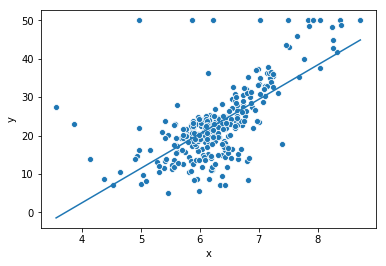

In [51]:
#predict y for all x
y_pred = theta[0] + theta[1] * X[:, 1]

#plot
df_line = pd.DataFrame ({'x': X[:, 1], 'y': y_pred})
sns.scatterplot (x = 'rm', y = 'medv', data = df)
sns.lineplot (x = 'x', y = 'y', data = df_line)
plt.show ()

### Multiple Linear Regression - Analytical Solution

<img src="LR_analyticalSol.png">

#### plot 'medv' for 'rm' and 'lstat'

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(azim=30)

xs = df ['rm']
ys = df ['lstat']
zs = df ['medv']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Rooms')
ax.set_ylabel('Lower Status Population')
ax.set_zlabel('Value of Home')

plt.show()

#### prepare X and y

In [ ]:
X = np.ones ((df.shape[0], 3))
X [:, 1:] = df [['rm', 'lstat']]
#X.shape #(333, 3)
y = df ['medv'].to_numpy ().reshape (df.shape[0], 1)
#y.shape #(333, 1)

#### calculate theta

In [ ]:
Xt = np.transpose (X)
# theta = INVERSE(X_transpose DOT X) DOT X_transpose DOT y
theta = np.dot (np.dot (np.linalg.inv (np.dot (Xt, X)), Xt), y)

In [ ]:
theta

    output:
        array([[ 0.1039438 ],
           [ 4.92846523],
           [-0.65639414]])

#### plot the predicted plane

In [ ]:
#predict y for all x
y_pred = theta[0] + theta[1] * X[:, 1] + theta[2] * X[:, 2]

#plot
df_plane = pd.DataFrame ({'x1': X[:, 1], 'x2': X[:, 2], 'y': y_pred})

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(azim=30) #for angle '0' we can see a straight line. try 120 for more intuition

xs = df_plane ['x1']
ys = df_plane ['x2']
zs = df_plane ['y']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Rooms')
ax.set_ylabel('Lower Status Population')
ax.set_zlabel('Predicted Value of Home')

plt.show()

### Simple Linear Regression - Numerical Solution (Gradient Descent)

#### prepare X and y

In [ ]:
X = np.ones ((df.shape[0], 2))
X [:, 1] = df ['rm']
#X.shape #(333, 2)
y_actual = df ['medv'].to_numpy ().reshape (df.shape[0], 1)
#y.shape #(333, 1)

#### calculate gradient

In [ ]:
N = df.shape[0] #number of observations
theta = np.zeros (2).reshape (2, 1) #initialize theta
learning_rate = 0.001
y_predict = np.dot (X, theta) #predict y = X.theta
y_diff = y_actual - y_predict #difference in prediction
cost = np.sum (np.square (y_diff))/N #cost

for i in range (1000000):
    X_ = X[:, 1].reshape (N, 1)
    d_theta_0 = (-2/N) * np.sum( y_diff) #derivative of theta_0
    d_theta_1 = (-2/N) * np.sum( np.multiply (y_diff, X_)) #derivative of theta_1
    theta[0] = theta[0] - (learning_rate * d_theta_0)
    theta[1] = theta[1] - (learning_rate * d_theta_1)
    y_predict = np.dot (X, theta) #predict y = X.theta
    y_diff = y_actual - y_predict #difference in prediction
    previous_cost = cost
    cost = np.sum (np.square (y_diff))/N #cost
    if (i % 10000 == 0):
        print (theta, cost)
    if (previous_cost - cost < 0.0000001):
        print (theta, cost)
        break

    Gradient Solution Output:
        [[0.04553754]
     [0.2942005 ]] 517.299686479311
    [[-30.52058125]
     [  8.51087986]] 44.11469319275882
    [[-33.12946905]
     [  8.92221185]] 44.00368979125995
     
    Analytical Solution Output:
        array([[-33.53672509],
       [  8.98642214]])

#### test the results

In [ ]:
N = df_test.shape[0] #number of observations
X = np.ones ((df_test.shape[0], 2))
X [:, 1] = df_test ['rm']
#X.shape #(333, 2)
y_actual = df_test ['medv'].to_numpy ().reshape (df_test.shape[0], 1)
#y.shape #(333, 1)
y_predict = np.dot (X, theta) #predict y = X.theta
for i in range (N):
    if (abs (y_actual[i] - y_predict[i]) < 3):
        print (y_actual[i], y_predict[i], 'yay!')
    else:
        print (y_actual[i], y_predict[i])

### Multiple Linear Regression - Numerical Solution (Gradient Descent)

#### prepare X and y

In [ ]:
X = np.ones ((df.shape[0], 3))
X [:, 1:] = df [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df ['medv'].to_numpy ().reshape (df.shape[0], 1)
#y.shape #(333, 1)

#### calculate gradient

In [ ]:
N = df.shape[0] #number of observations
theta = np.zeros (3).reshape (3, 1) #initialize theta
learning_rate = 0.001
y_predict = np.dot (X, theta) #predict y = X.theta
y_diff = y_actual - y_predict #difference in prediction
cost = np.sum (np.square (y_diff))/N #cost

for i in range (1000000):
    X_1 = X[:, 1].reshape (N, 1)
    X_2 = X[:, 2].reshape (N, 1)
    d_theta_0 = (-2/N) * np.sum( y_diff) #derivative of theta_0
    d_theta_1 = (-2/N) * np.sum( np.multiply (y_diff, X_1)) #derivative of theta_1
    d_theta_2 = (-2/N) * np.sum( np.multiply (y_diff, X_2)) #derivative of theta_2
    theta[0] = theta[0] - (learning_rate * d_theta_0)
    theta[1] = theta[1] - (learning_rate * d_theta_1)
    theta[2] = theta[2] - (learning_rate * d_theta_2)
    y_predict = np.dot (X, theta) #predict y = X.theta
    y_diff = y_actual - y_predict #difference in prediction
    previous_cost = cost
    cost = np.sum (np.square (y_diff))/N #cost
    if (i % 100000 == 0):
        print (theta, cost)
    if (previous_cost - cost < 0.0000000000001):
        print (theta, cost)
        break

    Gradient Solution Output:
        [[ 0.10478233]
         [ 4.92834894]
         [-0.65640253]] 30.679308946768124
        [[ 0.10478232]
         [ 4.92834894]
         [-0.65640253]] 30.679308946768025
        [[ 0.10478231]
         [ 4.92834894]
         [-0.65640253]] 30.67930894676793
        [[ 0.1047823 ]
         [ 4.92834894]
         [-0.65640253]] 30.679308946767822
         
    Analytical Solution Output:
    array([[ 0.1039438 ],
       [ 4.92846523],
       [-0.65639414]])

#### test the results

In [ ]:
N = df_test.shape[0] #number of observations
X = np.ones ((df_test.shape[0], 3))
X [:, 1:] = df_test [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df_test ['medv'].to_numpy ().reshape (df_test.shape[0], 1)
#y.shape #(333, 1)
y_predict = np.dot (X, theta) #predict y = X.theta
for i in range (N):
    if (abs (y_actual[i] - y_predict[i]) < 3):
        print (y_actual[i], y_predict[i], 'yay!')
    else:
        print (y_actual[i], y_predict[i])

### Polynomial Linear Regression - Numerical Solution (Gradient Descent)

#### prepare X and y

In [ ]:
X = np.ones ((df.shape[0], 5))
X [:, 1:3] = df [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df ['medv'].to_numpy ().reshape (df.shape[0], 1)
#y.shape #(333, 1)
X [:, 3] = np.multiply (X [:, 1], X [:, 1]) #X1^2
X [:, 4] = np.multiply (X [:, 2], X [:, 2]) #X2^2
# Columns of X: (1, X1, X2, X1^2, X2^2)

#### calculate gradient - cost goes to infinity. theta rises indefinitely
            *** regularization required ***

In [ ]:
N = df.shape[0] #number of observations
theta = np.zeros (5).reshape (5, 1) #initialize theta
learning_rate = 0.001
y_predict = np.dot (X, theta) #predict y = X.theta
y_diff = y_actual - y_predict #difference in prediction
cost = np.sum (np.square (y_diff))/N #cost

for i in range (100):
    X_1 = X[:, 1].reshape (N, 1)
    X_2 = X[:, 2].reshape (N, 1)
    X_1SQ = X[:, 3].reshape (N, 1)
    X_2SQ = X[:, 4].reshape (N, 1)
    d_theta_0 = (-2/N) * np.sum( y_diff) #derivative of theta_0
    d_theta_1 = (-2/N) * np.sum( np.multiply (y_diff, X_1)) #derivative of theta_1
    d_theta_2 = (-2/N) * np.sum( np.multiply (y_diff, X_2)) #derivative of theta_2
    d_theta_3 = (-2/N) * np.sum( np.multiply (y_diff, X_1SQ)) #derivative of theta_3
    d_theta_4 = (-2/N) * np.sum( np.multiply (y_diff, X_2SQ)) #derivative of theta_4
    theta[0] = theta[0] - (learning_rate * d_theta_0)
    theta[1] = theta[1] - (learning_rate * d_theta_1)
    theta[2] = theta[2] - (learning_rate * d_theta_2)
    theta[3] = theta[3] - (learning_rate * d_theta_3)
    theta[4] = theta[4] - (learning_rate * d_theta_4)
    y_predict = np.dot (X, theta) #predict y = X.theta
    y_diff = y_actual - y_predict #difference in prediction
    previous_cost = cost
    cost = np.sum (np.square (y_diff))/N #cost
    if (i % 10 == 0):
        print (theta, cost)
    if (previous_cost - cost < 0.0000000000001):
        print (theta, cost)
        #break

#### calculate gradient - with regularization

In [ ]:
N = df.shape[0] #number of observations
theta = np.zeros (5).reshape (5, 1) #initialize theta
learning_rate = 0.000001 #IMPORTANT. higher learning rate jumps across the optimum
regularization_rate = 0.01
y_predict = np.dot (X, theta) #predict y = X.theta
y_diff = y_actual - y_predict #difference in prediction
cost = (np.sum (np.square (y_diff))/N \
       ) + regularization_rate * (np.sum (np.square (theta))/5) #cost

for i in range (100000000):
    X_1 = X[:, 1].reshape (N, 1)
    X_2 = X[:, 2].reshape (N, 1)
    X_1SQ = X[:, 3].reshape (N, 1)
    X_2SQ = X[:, 4].reshape (N, 1)
    d_theta_0 = (-2/N) * np.sum( y_diff) #derivative of theta_0
    d_theta_1 = (-2/N) * np.sum( np.multiply (y_diff, X_1)) + regularization_rate * (theta[1]) #derivative of theta_1
    d_theta_2 = (-2/N) * np.sum( np.multiply (y_diff, X_2)) + regularization_rate * (theta[2]) #derivative of theta_2
    d_theta_3 = (-2/N) * np.sum( np.multiply (y_diff, X_1SQ)) + regularization_rate * (theta[3]) #derivative of theta_3
    d_theta_4 = (-2/N) * np.sum( np.multiply (y_diff, X_2SQ)) + regularization_rate * (theta[4]) #derivative of theta_4
    theta[0] = theta[0] - (learning_rate * d_theta_0)
    theta[1] = theta[1] - (learning_rate * d_theta_1)
    theta[2] = theta[2] - (learning_rate * d_theta_2)
    theta[3] = theta[3] - (learning_rate * d_theta_3)
    theta[4] = theta[4] - (learning_rate * d_theta_4)
    y_predict = np.dot (X, theta) #predict y = X.theta
    y_diff = y_actual - y_predict #difference in prediction
    previous_cost = cost
    cost = (np.sum (np.square (y_diff))/N \
       ) + regularization_rate * (np.sum (np.square (theta))/5) #cost
    if (i % 100000 == 0):
        print (theta, cost)
    if (previous_cost - cost < 0.000001):
        print (theta, cost)
        #break

    Gradient Solution Output:
        [[ 0.84203696]
         [ 1.94427898]
         [-1.01054065]
         [ 0.46215521]
         [ 0.0177273 ]] 26.5120574995123
         
         more iterations...
         
         with regularization_rate = 0.1
         [[ 2.14763657]
         [ 3.51213761]
         [-1.32455211]
         [ 0.24723676]
         [ 0.02467038]] 25.05696016191588

         with regularization_rate = 0.01
         [[ 2.09450704]
         [ 4.3411159 ]
         [-1.46105151]
         [ 0.1456098 ]
         [ 0.02778164]] 24.41253762179367

#### test the results

In [ ]:
N = df_test.shape[0] #number of observations

X = np.ones ((df_test.shape[0], 5))
X [:, 1:3] = df_test [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df_test ['medv'].to_numpy ().reshape (df_test.shape[0], 1)
#y.shape #(333, 1)
X [:, 3] = np.multiply (X [:, 1], X [:, 1]) #X1^2
X [:, 4] = np.multiply (X [:, 2], X [:, 2]) #X2^2
# Columns of X: (1, X1, X2, X1^2, X2^2)

y_predict = np.dot (X, theta) #predict y = X.theta
for i in range (N):
    if (abs (y_actual[i] - y_predict[i]) < 3):
        print (y_actual[i], y_predict[i], 'yay!')
    else:
        print (y_actual[i], y_predict[i])

### Polynomial Linear Regression - Analytical Solution

<img src="PolyLR_analyticalSol.png">

#### prepare X and y

In [ ]:
X = np.ones ((df.shape[0], 5))
X [:, 1:3] = df [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df ['medv'].to_numpy ().reshape (df.shape[0], 1)
#y.shape #(333, 1)
X [:, 3] = np.multiply (X [:, 1], X [:, 1]) #X1^2
X [:, 4] = np.multiply (X [:, 2], X [:, 2]) #X2^2
# Columns of X: (1, X1, X2, X1^2, X2^2)

#### calculate theta (the letter 'a' in the picture above)

In [ ]:
regularization_rate = 0.01
I = np.identity (5)
Xt = np.transpose (X)
# theta = INVERSE(X_transpose DOT X + regularization * I) DOT X_transpose DOT y
theta = np.dot (np.dot (np.linalg.inv (np.dot (Xt, X) + regularization_rate*I), Xt), y_actual)

#### test the results

In [ ]:
N = df_test.shape[0] #number of observations

X = np.ones ((df_test.shape[0], 5))
X [:, 1:3] = df_test [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df_test ['medv'].to_numpy ().reshape (N, 1)
#y.shape #(333, 1)
X [:, 3] = np.multiply (X [:, 1], X [:, 1]) #X1^2
X [:, 4] = np.multiply (X [:, 2], X [:, 2]) #X2^2
# Columns of X: (1, X1, X2, X1^2, X2^2)

y_predict = np.dot (X, theta) #predict y = X.theta
for i in range (N):
    if (abs (y_actual[i] - y_predict[i]) < 3):
        print (y_actual[i], y_predict[i], 'yay!')
    else:
        print (y_actual[i], y_predict[i])

### Towards Bayesian Treatment

In [3]:
import math
def get_uniform (x, mu, std):
    return (1/(std*math.sqrt(2*math.pi)))*math.exp(-1*(x - mu)*(x - mu)/(2*std*std))

In [4]:
get_uniform (0, 0, 1)

0.3989422804014327

#### prepare X and y (Polynomial Linear Regression  - Analytical Solution)

In [5]:
X = np.ones ((df.shape[0], 5))
X [:, 1:3] = df [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df ['medv'].to_numpy ().reshape (df.shape[0], 1)
#y.shape #(333, 1)
X [:, 3] = np.multiply (X [:, 1], X [:, 1]) #X1^2
X [:, 4] = np.multiply (X [:, 2], X [:, 2]) #X2^2
# Columns of X: (1, X1, X2, X1^2, X2^2)

#### calculate wML (weights that maximize the likelihood of observed training data)

In [6]:
regularization_rate = 0.01
I = np.identity (5)
Xt = np.transpose (X)
# theta = INVERSE(X_transpose DOT X + regularization * I) DOT X_transpose DOT y
wML = np.dot (np.dot (np.linalg.inv (np.dot (Xt, X) + regularization_rate*I), Xt), y_actual)

In [7]:
wML

array([[ 1.07023514e+02],
       [-2.69739604e+01],
       [-1.37682567e+00],
       [ 2.45976742e+00],
       [ 2.04488372e-02]])

#### calculate betaML (inverse variance of the distribution)

In [8]:
N = df.shape[0] #number of observations
y_predict = np.dot (X, wML) #predict y = X.wML
y_diff = y_actual - y_predict #difference in prediction
cost = np.sum (np.square (y_diff))/N
betaML = 1 / cost

In [9]:
betaML

0.049416489223432995

In [ ]:
N = df_test.shape[0] #number of observations

X = np.ones ((df_test.shape[0], 5))
X [:, 1:3] = df_test [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df_test ['medv'].to_numpy ().reshape (N, 1)
#y.shape #(333, 1)
X [:, 3] = np.multiply (X [:, 1], X [:, 1]) #X1^2
X [:, 4] = np.multiply (X [:, 2], X [:, 2]) #X2^2
# Columns of X: (1, X1, X2, X1^2, X2^2)

y_predict = np.dot (X, wML) #predict y = X.theta

In [17]:
for i in range (0, 5):
    print (y_predict[i])

[16.89631093]
[23.18228576]
[25.26584966]
[17.57948401]
[27.80278114]


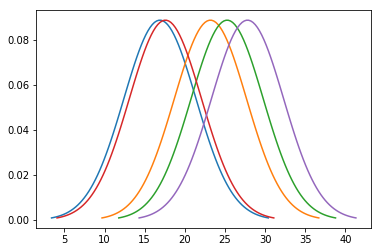

In [18]:
import scipy.stats as stats

variance = 1/betaML
sigma = math.sqrt(variance)

for i in range (0, 5):
    mu = y_predict[i]
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.show()

#### test the results

In [10]:
N = df_test.shape[0] #number of observations

X = np.ones ((df_test.shape[0], 5))
X [:, 1:3] = df_test [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df_test ['medv'].to_numpy ().reshape (N, 1)
#y.shape #(333, 1)
X [:, 3] = np.multiply (X [:, 1], X [:, 1]) #X1^2
X [:, 4] = np.multiply (X [:, 2], X [:, 2]) #X2^2
# Columns of X: (1, X1, X2, X1^2, X2^2)

y_predict = np.dot (X, wML) #predict y = X.theta

for i in range (N):
    if (abs (y_actual[i] - y_predict[i]) < 3):
        print (y_actual[i], y_predict[i], 'yay!')
    else:
        print (y_actual[i], y_predict[i])

[21.7] [16.89631093]
[19.9] [23.18228576]
[24.7] [25.26584966] yay!
[18.9] [17.57948401] yay!
[24.7] [27.80278114]
[33.] [29.77881863]
[23.6] [31.83279132]
[18.5] [22.38129453]
[19.3] [18.27442018] yay!
[18.8] [15.57490826]
[19.4] [16.55789996] yay!
[23.3] [26.61023367]
[27.] [27.56696288] yay!
[25.] [22.47459585] yay!
[22.6] [22.04938651] yay!
[37.9] [33.78899835]
[30.5] [30.94665277] yay!
[29.1] [30.52666603] yay!
[24.4] [18.11473206]
[26.2] [28.67351146] yay!
[30.7] [22.94916712]
[22.3] [25.49382261]
[26.4] [25.19302975] yay!
[33.1] [32.39248263] yay!
[36.1] [32.07326275]
[28.4] [25.56703104] yay!
[23.1] [22.99269079] yay!
[19.] [22.22343393]
[16.5] [25.44249265]
[17.8] [16.48319967] yay!
[16.1] [17.0248433] yay!
[17.8] [24.72944459]
[14.1] [17.50417809]
[13.5] [16.12333154] yay!
[21.4] [19.74253841] yay!
[18.3] [17.96404399] yay!


In [11]:
df_test.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
10,16,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
25,44,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
34,55,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9
36,57,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77,24.7


In [39]:
N = df_test.shape[0] #number of observations

X = np.ones ((df_test.shape[0], 5))
X [:, 1:3] = df_test [['rm', 'lstat']]
#X.shape #(333, 3)
y_actual = df_test ['medv'].to_numpy ().reshape (N, 1)
#y.shape #(333, 1)
X [:, 3] = np.multiply (X [:, 1], X [:, 1]) #X1^2
X [:, 4] = np.multiply (X [:, 2], X [:, 2]) #X2^2
# Columns of X: (1, X1, X2, X1^2, X2^2)

y_predict = np.dot (X, wML) #predict y = X.theta

In [12]:
1/betaML

20.236160352844454

In [44]:
get_uniform (24, 29.61, (1/betaML))

0.018670624537714803

In [41]:
y_predict

array([[29.617263  ],
       [24.27656286],
       [30.5178506 ],
       [36.27655418],
       [26.85346834],
       [21.09976488],
       [25.20167105],
       [19.32005635],
       [17.74082917],
       [16.03546638],
       [17.11186964],
       [26.89303208],
       [27.04769288],
       [21.29475656],
       [23.95209985],
       [28.44421377],
       [32.45005225],
       [32.35900409],
       [32.01328151],
       [28.77123106],
       [23.22276679],
       [22.10769248],
       [16.3762319 ],
       [20.34646418],
       [18.21934932],
       [10.75501176],
       [14.680403  ],
       [19.25857551],
       [15.99425813],
       [19.41713387],
       [17.18328242],
       [19.46028581]])